In [14]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pandas_profiling

C:\Users\arpan\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\arp

In [220]:
udf = pd.read_csv('users_large.csv')
udf.head()

,gender,dob,location,partner,userId
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861
2,female,1975-02-11 19:00:00,"57.7414159200000014,12.0753449899999996",c361c367944749f78b09beedce4816db,7fa6c0917f99407eaeda91908fc92235
3,male,1979-07-09 20:00:00,"-33.4293767040255361,-70.5886206036256141",770197a06a4f4b7f97f9a4d1d9a0b405,474db47f079b4b05aefc5989bcd22f62
4,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab


In [4]:
len(udf)

8967

In [227]:
usplit_df.dtypes.astype(str).to_dict()

{'dob': 'object', 'b_time': 'object'}

In [224]:
(pd.to_datetime('today').year-pd.to_datetime('1954-01-16').year)

64

In [230]:
# Splitting the dob column to get year of birth

usplit_df = pd.DataFrame(udf.dob.str.split(' ',1).tolist(), columns = ['dob','b_time'])
usplit_df['dob'] = usplit_df['dob'].str[:4]

# subtracting all the years from 2018 to get the age of all users
usplit_df['dob'] = pd.to_numeric(usplit_df['dob'])
usplit_df['age'] = 2018 - usplit_df['dob']
del usplit_df['b_time']

usplit_df.head()

,dob,age
0,1954,64
1,1980,38
2,1975,43
3,1979,39
4,1989,29


In [231]:
del usplit_df['dob']

In [233]:
final_udf = pd.concat([udf, usplit_df], axis=1)
final_udf.head()

,gender,dob,location,partner,userId,age
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c,64
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38
2,female,1975-02-11 19:00:00,"57.7414159200000014,12.0753449899999996",c361c367944749f78b09beedce4816db,7fa6c0917f99407eaeda91908fc92235,43
3,male,1979-07-09 20:00:00,"-33.4293767040255361,-70.5886206036256141",770197a06a4f4b7f97f9a4d1d9a0b405,474db47f079b4b05aefc5989bcd22f62,39
4,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29


In [102]:
idf = pd.read_csv('intervals_large.csv')

C:\Users\arpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [7]:
len(idf)

1042308

In [16]:
pandas_profiling.ProfileReport(idf)

Number of variables,16
Number of observations,1042308
Total Missing (%),21.9%
Total size in memory,127.2 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [38]:
# data types of all columns in idf dataframe
idf.dtypes.astype(str).to_dict()

{'end_ts': 'datetime64[ns]',
 'score': 'int64',
 'start_ts': 'datetime64[ns]',
 'user_id': 'object',
 'session_duration_seconds': 'object',
 'sleep_duration_seconds': 'object',
 'presence_duration_seconds': 'object',
 'tnt_count': 'float64',
 'avg_bedtemp_c': 'float64',
 'avg_heart_rate': 'float64',
 'avg_resp_rate': 'float64',
 'avg_roomtemp_c': 'float64',
 'deep_duration': 'float64',
 'light_duration': 'float64',
 'rem_duration': 'float64',
 'id': 'object'}

In [100]:
# converting 'end_ts' and 'start_ts' to pandas datetime object

idf['end_ts'] = pd.to_datetime(idf['end_ts'])
idf['start_ts'] = pd.to_datetime(idf['start_ts'])

In [101]:
# Converting the UTC times to the local timezone (New York in this case, which is 4 hours behind UTC)

idf['end_ts'] = idf['end_ts'] - pd.to_timedelta(4, unit='h')
idf['start_ts'] = idf['start_ts'] - pd.to_timedelta(4, unit='h')

In [75]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 05:05:00,92,2017-12-12 19:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 06:58:00,81,2017-12-12 20:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 08:22:00,64,2017-12-11 23:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 07:36:00,62,2017-10-04 20:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 01:44:00,12,2017-10-10 00:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [76]:
idf['user_id'].nunique()

6513

In [77]:
udf['userId'].nunique()

8950

In [122]:
# Splitting the start_ts column to get the start dates and times alone

ndf = pd.DataFrame(idf.start_ts.str.split(' ',1).tolist(), columns = ['start_date','start_time'])
ndf.head()

,start_date,start_time
0,2017-12-12,23:26:00
1,2017-12-13,00:43:00
2,2017-12-12,03:51:00
3,2017-10-05,00:52:00
4,2017-10-10,04:54:00


In [123]:
# Splitting the end_ts column to get the end dates and times alone

edf = pd.DataFrame(idf.end_ts.str.split(' ',1).tolist(), columns = ['end_date','end_time'])
edf.head()

,end_date,end_time
0,2017-12-13,09:05:00
1,2017-12-13,10:58:00
2,2017-12-12,12:22:00
3,2017-10-05,11:36:00
4,2017-10-10,05:44:00


In [106]:
ndf.dtypes.astype(str).to_dict()

{'start_date': 'object', 'start_time': 'object'}

In [124]:
# Extracting only the hour and month of goint to bed(start)

ndf['start_hour'] = ndf['start_time'].str[:2]
ndf['start_month'] = ndf['start_date'].str[5:7]
ndf.head()

,start_date,start_time,start_hour,start_month
0,2017-12-12,23:26:00,23,12
1,2017-12-13,00:43:00,00,12
2,2017-12-12,03:51:00,03,12
3,2017-10-05,00:52:00,00,10
4,2017-10-10,04:54:00,04,10


In [125]:
ndf['end_hour'] = edf['end_time'].str[:2]
ndf['end_month'] = edf['end_date'].str[5:7]
ndf.head()

,start_date,start_time,start_hour,start_month,end_hour,end_month
0,2017-12-12,23:26:00,23,12,09,12
1,2017-12-13,00:43:00,00,12,10,12
2,2017-12-12,03:51:00,03,12,12,12
3,2017-10-05,00:52:00,00,10,11,10
4,2017-10-10,04:54:00,04,10,05,10


In [127]:
del ndf['start_date']
del ndf['start_time']
ndf.head()

,start_hour,start_month,end_hour,end_month
0,23,12,09,12
1,00,12,10,12
2,03,12,12,12
3,00,10,11,10
4,04,10,05,10


In [197]:
result = pd.concat([idf, ndf], axis=1)
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,12,09,12
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,12,10,12
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,12,12,12
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,10,11,10
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,10,05,10


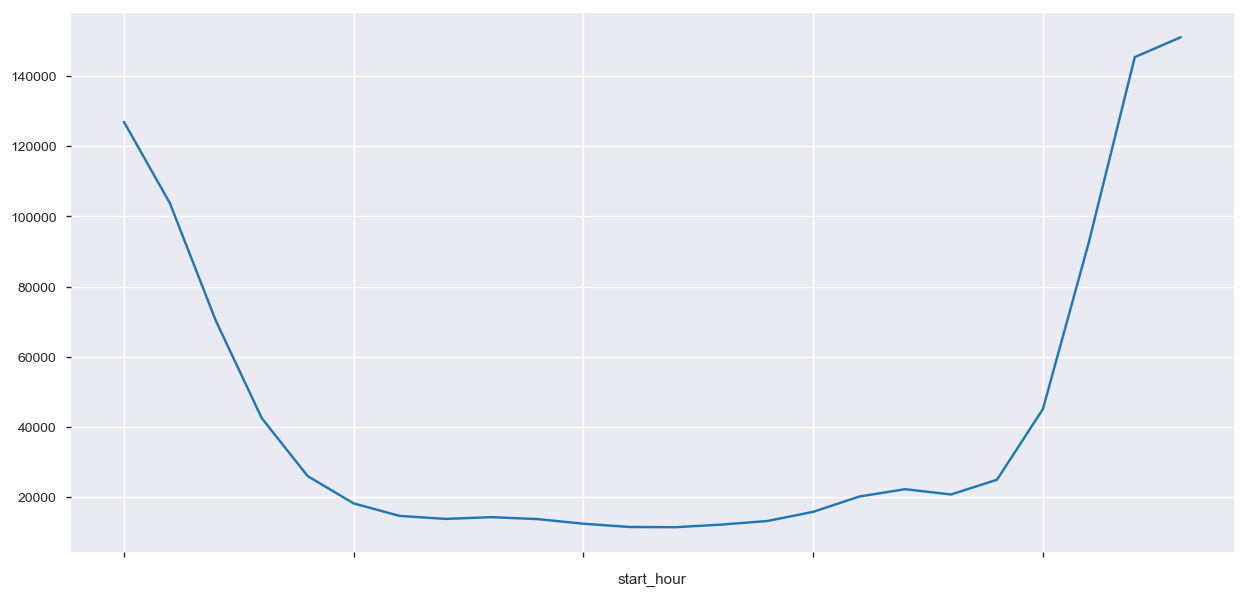

In [413]:
fig, ax = plt.subplots(figsize=(15,7))
result_new1.plot(ax=ax)

Text(0.5,0,'Month')

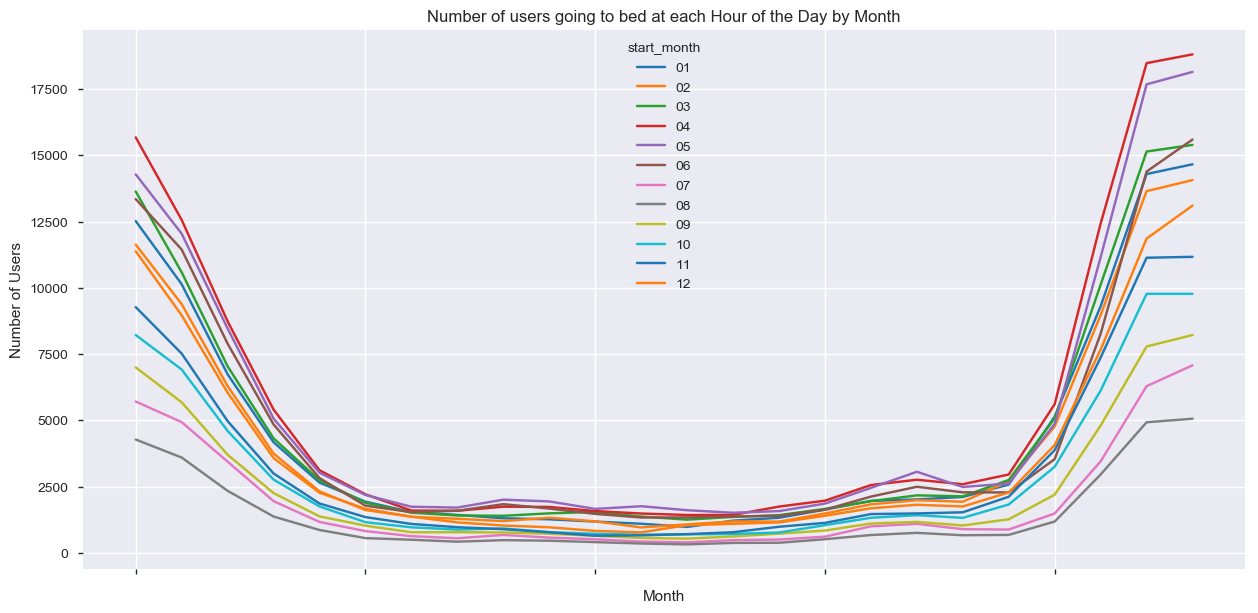

In [422]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
result_new.plot(ax=ax)
plt.title('Number of users going to bed at each Hour of the Day by Month')
plt.ylabel('Number of Users')
plt.xlabel('Month')
# .groupby(['start_month','start_hour']).count()['sleep_duration_seconds'].unstack()

In [167]:
# Substituting the month numbers by their names (abbreviations) in dataframe "result"

look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

result['start_month'] = result['start_month'].apply(lambda x: look_up[x])
result['end_month'] = result['end_month'].apply(lambda x: look_up[x])
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,Dec,09,Dec
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,Dec,10,Dec
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,Dec,12,Dec
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,Oct,11,Oct
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,Oct,05,Oct


In [590]:
result['tnt_count'].isnull().values.any()

False

In [432]:
res_new = result.dropna()

In [314]:
# Removing "," from the following columns to use them as numeric types

result['sleep_duration_seconds'] = result.sleep_duration_seconds.str.replace(",", "")
result['session_duration_seconds'] = result.session_duration_seconds.str.replace(",", "")
result['presence_duration_seconds'] = result.presence_duration_seconds.str.replace(",", "")
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,34020,26700,34020,8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,12,09,12
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,36060,34140,35400,13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,12,10,12
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,29940,23340,27480,20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,12,12,12
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,37980,18000,37260,6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,10,11,10
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,2880,1800,2880,0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,10,05,10


In [187]:
result['tnt_count'].isnull().any().any()

False

In [411]:
result_new1 = result.groupby(['start_hour']).count()['user_id']
result_new1.head()

start_hour
00    126930
01    103756
02     70252
03     42471
04     25950
Name: user_id, dtype: int64

In [412]:
result_new2 = result.groupby(['start_month']).count()['user_id']
result_new2.head()

start_month
01    103179
02     96033
03    109358
04    130177
05    124881
Name: user_id, dtype: int64

In [194]:
# Sorting the index in order of months

result_new.index = pd.CategoricalIndex(result_new.index, 
                               categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], 
                               sorted=True)
result_new = result_new.sort_index()

In [201]:
result_new.head()

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_month,,,,,,,,,,,,,,,,,,,,,
Jan,12517,10134,6736,4173,2651,1931,1541,1432,1305,1266,...,1324,1631,1963,2016,2109,2578,5142,9305,14291,14659
Feb,11380,8962,6042,3575,2269,1662,1362,1285,1199,1327,...,1180,1486,1831,1988,1929,2695,4769,8971,13647,14062
Mar,13633,10585,7038,4319,2738,1891,1516,1410,1399,1491,...,1423,1659,1950,2170,2133,2749,5078,10118,15141,15391
Apr,15674,12560,8734,5407,3116,2208,1596,1588,1743,1733,...,1746,1969,2558,2759,2590,2957,5611,12425,18475,18806
May,14279,12040,8464,5067,3023,2183,1740,1709,2007,1941,...,1576,1859,2451,3059,2486,2615,4866,11155,17676,18145


Text(0.5,0,'Month')

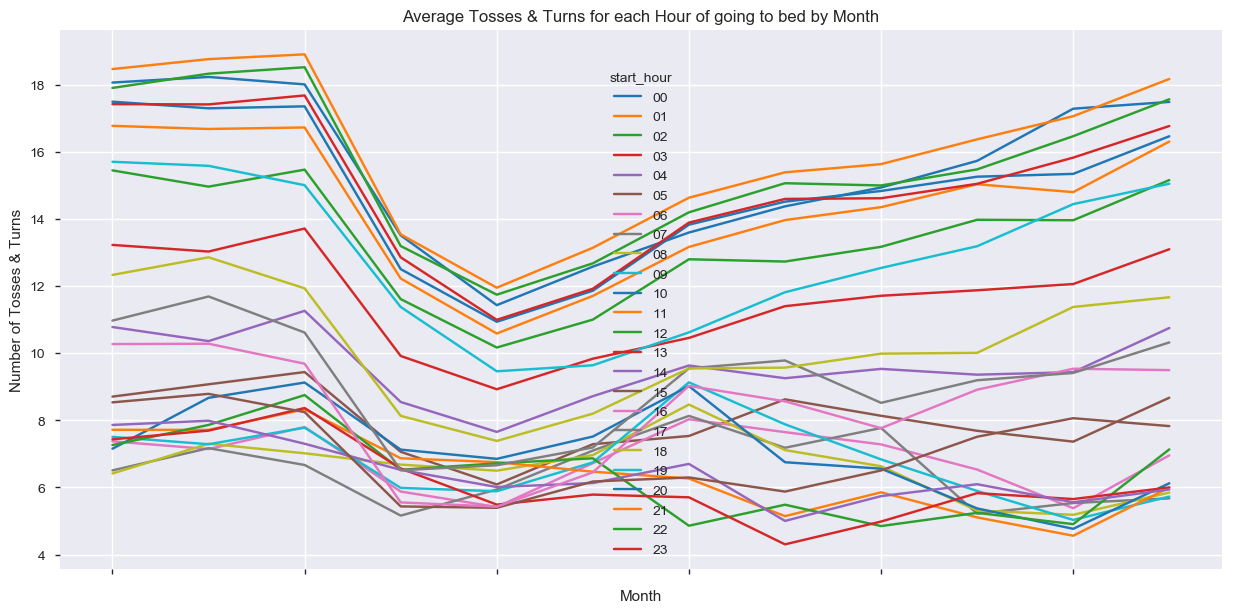

In [199]:
# fig, ax = plt.subplots(figsize=(15,7))
# result.groupby(['start_month','start_hour']).mean()['tnt_count'].unstack().plot(ax=ax)
# plt.title('Average Tosses & Turns for each Hour of going to bed by Month')
# plt.ylabel('Number of Tosses & Turns')
# plt.xlabel('Month')

Text(0.5,0,'Hour')

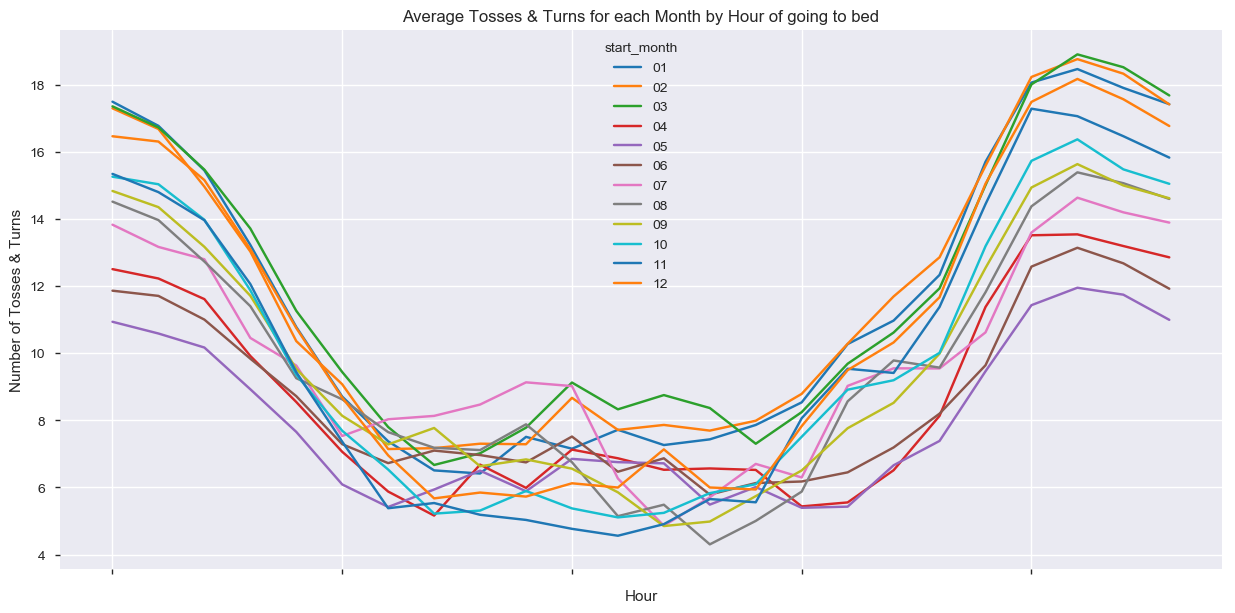

In [420]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby(['start_hour', 'start_month']).mean()['tnt_count'].unstack().plot(ax=ax)
plt.title('Average Tosses & Turns for each Month by Hour of going to bed')
plt.ylabel('Number of Tosses & Turns')
plt.xlabel('Hour')

In [438]:
# Converting datatype of sleep duration in 'res_new' dataframe

res_new['sleep_duration_seconds'] = pd.to_numeric(res_new['sleep_duration_seconds'])

C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [449]:
# Average/Mean Sleep duration grouped by 'start hour'

xl2 = res_new.groupby(['start_hour']).mean()['sleep_duration_seconds']
xl2.head()

start_hour
00    16860.199557
01    15912.578313
02    16333.880597
03    14464.333333
04    14476.438356
Name: sleep_duration_seconds, dtype: float64

In [452]:
# Coverting 'xl2' pandas series to pandas dataframe 'xl2df'

xl2df = pd.DataFrame({'start_hour':xl2.index, 'sleep_duration':xl2.values})
xl2df.head()

,sleep_duration,start_hour
0,16860.199557,00
1,15912.578313,01
2,16333.880597,02
3,14464.333333,03
4,14476.438356,04


Text(0.5,1,'Bar Plot of Sleep Duration of users Grouped by the time they go to bed')

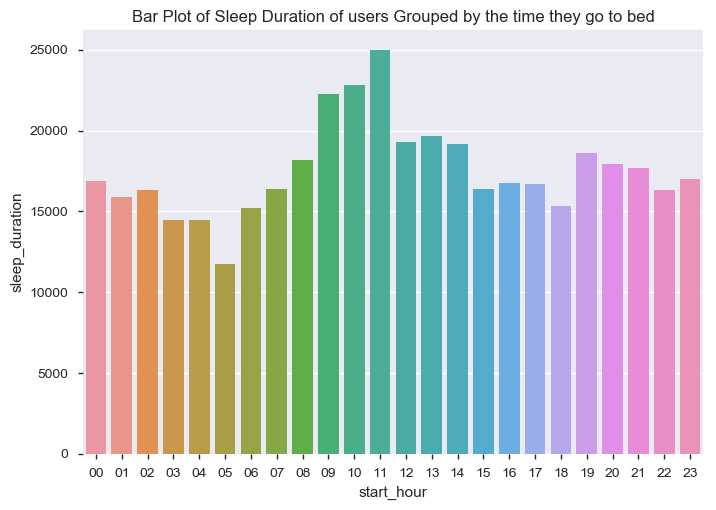

In [459]:
# Plotting a Bar graph of sleep duration of users grouped by the the time they go to bed

import seaborn as sns
sns.barplot(x=xl2df['start_hour'], y=xl2df['sleep_duration']).set_title('Bar Plot of Sleep Duration of users Grouped by the time they go to bed')

Text(0.5,0,'Hour')

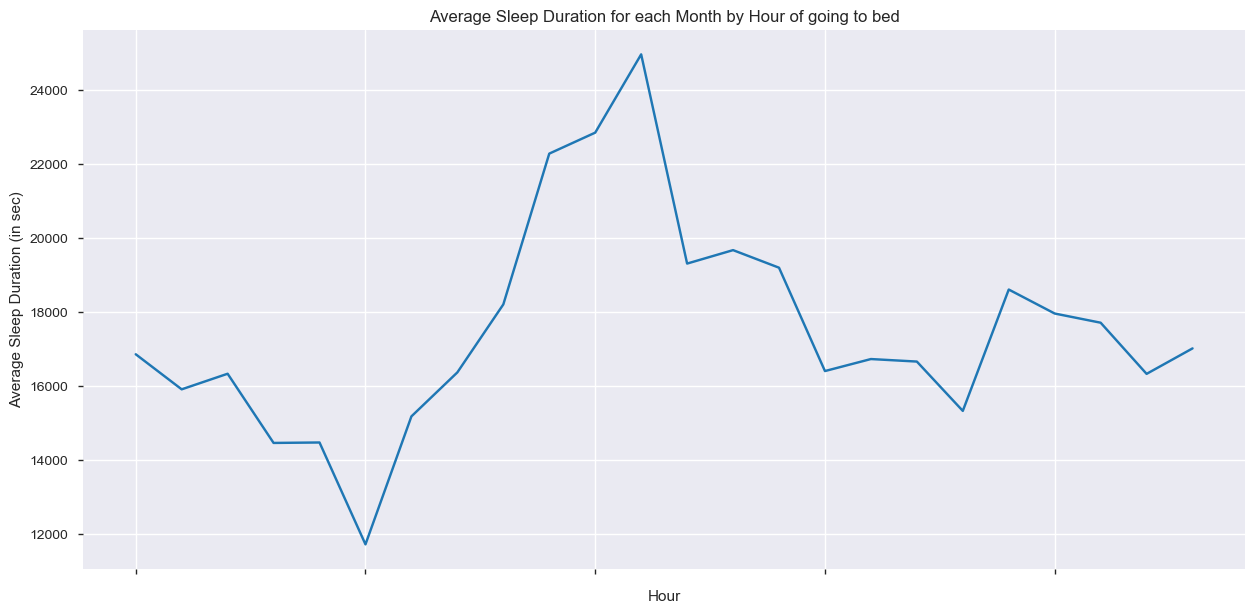

In [445]:
fig, ax = plt.subplots(figsize=(15,7))
res_new.groupby(['start_hour']).mean()['sleep_duration_seconds'].plot(ax=ax)
plt.title('Average Sleep Duration for each Month by Hour of going to bed')
plt.ylabel('Average Sleep Duration (in sec)')
plt.xlabel('Hour')

In [202]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Categorical Scatterplots

### The plot below shows the deep-sleep duration of users for every month of the year. What is strikingly clear is that in the month of August, users typically get a very longer period of deep sleep.

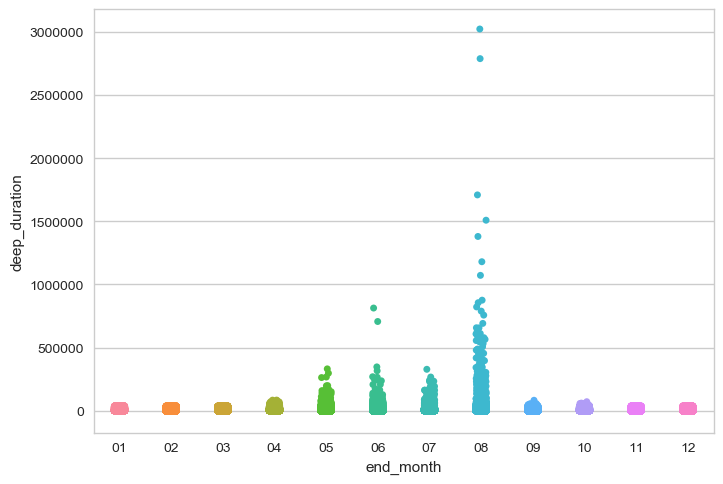

In [203]:
sns.stripplot(x="end_month", y="deep_duration", data=result, jitter=True).set_title("Duration of Deep Sleep by Month")

## Swarmplots

In [315]:
new_df = pd.merge(final_udf, result, how='left', left_on=['userId'], right_on=['user_id'])
new_df.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c,64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-16 08:51:00,19.0,2017-11-16 04:54:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,0.0,2760.0,0.0,"53,267,017",04,11,08,11
2,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-07 08:27:00,49.0,2017-11-06 23:34:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,1200.0,12360.0,0.0,"46,898,272",23,11,08,11
3,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-04 11:56:00,68.0,2017-11-03 23:00:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,3600.0,17160.0,0.0,"44,785,269",23,11,11,11
4,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-04 17:08:00,16.0,2017-11-04 14:20:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,0.0,2340.0,0.0,"44,844,084",14,11,17,11


In [ ]:
result_new = result.groupby(['start_hour','start_month']).mean()['sleep_duration_seconds'].unstack()
result_new.head()

In [235]:
len(new_df)

1047008

In [467]:
avnew_df = new_df.dropna()
avnew_df.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,start_hour,start_month,end_hour,end_month
437,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 19:38:00,57.0,2018-06-22 14:08:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,45.924441,10.055331,22.814579,1260.0,5160.0,6960.0,14,06,19,06
450,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 22:41:00,24.0,2018-06-22 20:54:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,48.522727,10.000000,20.578651,300.0,2580.0,1020.0,20,06,22,06
500,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-24 12:31:00,86.0,2018-06-24 00:17:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,60.464121,10.274538,22.225674,600.0,16860.0,10620.0,00,06,12,06
509,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-23 11:04:00,94.0,2018-06-23 01:26:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,68.570583,10.206400,21.605350,2280.0,17220.0,11700.0,01,06,11,06
749,female,1974-03-25 22:42:05,"22.95135616829808,114.054411433392701",b5f5323d9a85420a97a6f40e048855d2,7f3638cc7bd0431dbbc0cfa6a5084892,44,2018-06-24 09:59:00,65.0,2018-06-24 00:53:00,7f3638cc7bd0431dbbc0cfa6a5084892,...,61.170181,10.368031,22.162702,2820.0,10620.0,5220.0,00,06,09,06


In [465]:
vv_new = avnew_df.groupby(['userId']).mean()['sleep_duration_seconds']
vv_new.head()

userId
000082c978564cfb8975ad180295d080    22180.0
0003fd87352c4bb7b31fe469b10dbc4b    15140.0
000533dffabd4be6862fef16692d01bf    17800.0
0006f2b9e79346888424372e72976ffe     7260.0
0067aa4adb5b40ceb91a9cd369ede37f     5400.0
Name: sleep_duration_seconds, dtype: float64

In [466]:
pnew = avnew_df.groupby(['partner']).mean()['sleep_duration_seconds']
pnew.head()

partner
000082c978564cfb8975ad180295d080    13515.0
0003fd87352c4bb7b31fe469b10dbc4b    18000.0
000533dffabd4be6862fef16692d01bf    13620.0
0006f2b9e79346888424372e72976ffe    29010.0
0067aa4adb5b40ceb91a9cd369ede37f    14730.0
Name: sleep_duration_seconds, dtype: float64

In [408]:
pandas_profiling.ProfileReport(avnew_df)

Number of variables,26
Number of observations,8131
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,208.0 B
Numeric,10
Categorical,12
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [347]:
arpdf = new_df.groupby(['user_id','start_hour']).count().unstack()
arpdf.head()

gender                                     \
start_hour                           00    01    02    03    04    05   06   
user_id                                                                      
000082c978564cfb8975ad180295d080   42.0   2.0   NaN   NaN   1.0   1.0  NaN   
0003fd87352c4bb7b31fe469b10dbc4b    1.0   NaN   NaN   NaN   NaN   NaN  NaN   
000533dffabd4be6862fef16692d01bf    1.0   NaN   NaN   NaN   NaN   NaN  NaN   
0006f2b9e79346888424372e72976ffe   44.0  29.0  34.0  21.0  17.0  12.0  9.0   
001fd942f6664069904711fe18b32d1f   19.0   9.0   7.0   2.0   4.0   NaN  2.0   

                                                 ...   end_month            \
start_hour                         07   08   09  ...          14   15   16   
user_id                                          ...                         
000082c978564cfb8975ad180295d080  NaN  NaN  1.0  ...         5.0  3.0  6.0   
0003fd87352c4bb7b31fe469b10dbc4b  NaN  NaN  NaN  ...         2.0  6.0  2.0   
000533dffabd4be6862fef16692d01bf  NaN  NaN  NaN  ...         NaN  NaN  NaN   
0006f2b9e79346888424372e72976ffe  5.0  6.0  1.0  ...         2.0  2.0  2.0   
001fd942f6664069904711fe18b32d1f  NaN  NaN  NaN  ...         NaN  NaN  NaN   

                                                                           
start_hour                         17   18   19    20    21     22     23  
user_id                                                                    
000082c978564cfb8975ad180295d080  2.0  6.0  2.0   1.0  10.0   80.0  129.0  
0003fd87352c4bb7b31fe469b10dbc4b  1.0  1.0  NaN   NaN   NaN   26.0   26.0  
000533dffabd4be6862fef16692d01bf  NaN  1.0  1.0   7.0  45.0   23.0    7.0  
0006f2b9e79346888424372e72976ffe  2.0  3.0  5.0  12.0  38.0  101.0   69.0  
001fd942f6664069904711fe18b32d1f  NaN  NaN  NaN   1.0   5.0   20.0   25.0  

[5 rows x 576 columns]

In [316]:
# Grouping by users to get average respiration rate of each user

n1df = new_df.groupby('user_id', as_index=False)['tnt_count'].mean()
n1df.head()

,user_id,tnt_count
0,000082c978564cfb8975ad180295d080,19.448161
1,0003fd87352c4bb7b31fe469b10dbc4b,15.308824
2,000533dffabd4be6862fef16692d01bf,20.423529
3,0006f2b9e79346888424372e72976ffe,6.452153
4,001fd942f6664069904711fe18b32d1f,19.617021


In [318]:
# Grouping by users to get deep sleep duration of each user

new_df['sleep_duration_seconds'] = pd.to_numeric(new_df['sleep_duration_seconds'])

n2df = new_df.groupby('user_id', as_index=False)['sleep_duration_seconds'].mean()
n2df.head()

,user_id,sleep_duration_seconds
0,000082c978564cfb8975ad180295d080,23229.030100
1,0003fd87352c4bb7b31fe469b10dbc4b,16401.176471
2,000533dffabd4be6862fef16692d01bf,24271.764706
3,0006f2b9e79346888424372e72976ffe,15080.967742
4,001fd942f6664069904711fe18b32d1f,28631.489362


In [319]:
del n2df['user_id']

res_df = pd.concat([n1df, n2df], axis=1)
res_df.head()

,user_id,tnt_count,sleep_duration_seconds
0,000082c978564cfb8975ad180295d080,19.448161,23229.030100
1,0003fd87352c4bb7b31fe469b10dbc4b,15.308824,16401.176471
2,000533dffabd4be6862fef16692d01bf,20.423529,24271.764706
3,0006f2b9e79346888424372e72976ffe,6.452153,15080.967742
4,001fd942f6664069904711fe18b32d1f,19.617021,28631.489362


In [321]:
r4df = res_df[(res_df["tnt_count"] < 40) & (res_df["sleep_duration_seconds"] < 50000)]
len(r4df)

6321

# K-means Clustering

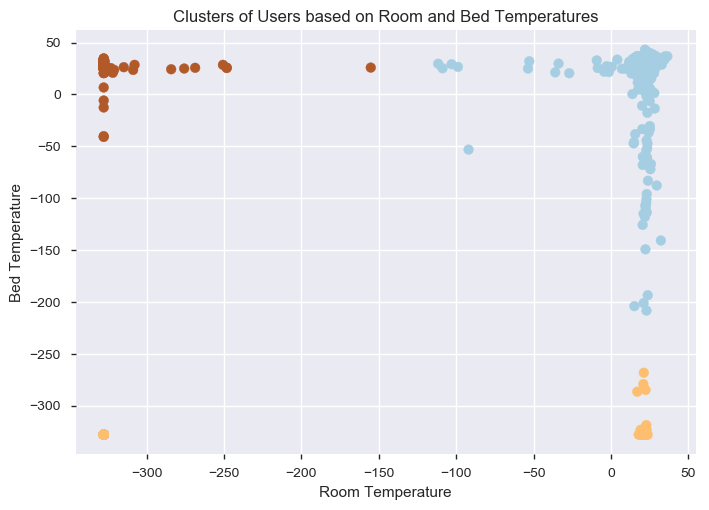

In [645]:
import numpy as np
from sklearn.cluster import KMeans

### We store feature data from our
### dataframe `r4df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = avnew_df['avg_roomtemp_c'].values
# f2 = avnew_df['sleep_duration_seconds'].values
# f3 = avnew_df['avg_resp_rate'].values
# f4 = avnew_df['deep_duration'].values
# f5 = avnew_df['light_duration'].values
# f6 = avnew_df['start_hour'].values
f2 = avnew_df['avg_bedtemp_c'].values
# f8 = avnew_df['tnt_count'].values
# f1 = avnew_df['avg_roomtemp_c'].values
# f2 = new_df['avg_resp_rate'].values
# ,f3,f4,f5,f6,f7,f8


X=np.array(list(zip(f1,f2)))

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# X=new_df.iloc[:, 0:20].values


# plt.scatter(f1, f2, c='black', s=7)
kmeans = KMeans(n_clusters=3).fit(X_std)
y_pred = kmeans.predict(X_std) #predicting labels (y) and saving to y_pred 

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.title('Clusters of Users based on Room and Bed Temperatures')
plt.xlabel('Room Temperature')
plt.ylabel('Bed Temperature')
plt.show()

In [648]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_9d = pca.fit_transform(X_std)

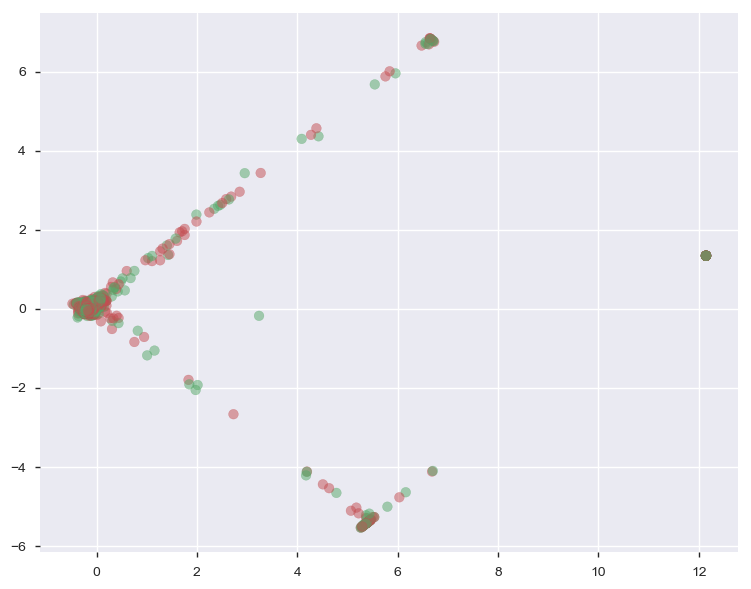

In [649]:
colors = ['r', 'g']
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c=colors,alpha=0.5)
# plt.ylim(-10,30)
plt.show()

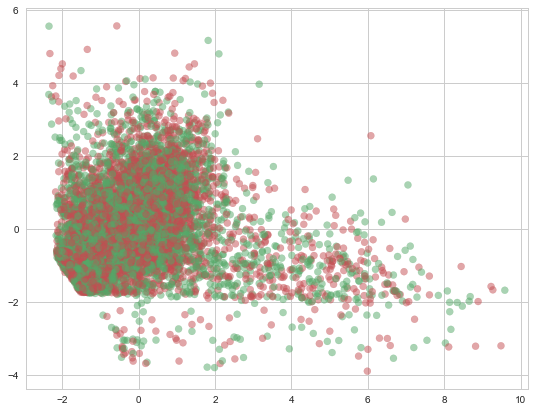

In [387]:
colors = ['r', 'g']
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c=colors,alpha=0.5)
# plt.ylim(-10,30)
plt.show()

# PCA

In [391]:
from sklearn.preprocessing import StandardScaler
features = ['sleep_duration_seconds', 'tnt_count', 'avg_roomtemp_c', 'avg_bedtemp_c', 'avg_resp_rate', 'deep_duration', 'light_duration']
# Separating out the features
x = avnew_df.loc[:, features].values
# Separating out the target
y = avnew_df.loc[:,['start_hour']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# f1 = avnew_df['avg_roomtemp_c'].values
# f2 = avnew_df['sleep_duration_seconds'].values
# f3 = avnew_df['avg_resp_rate'].values
# f4 = avnew_df['deep_duration'].values
# f5 = avnew_df['light_duration'].values
# f6 = avnew_df['start_hour'].values
# f7 = avnew_df['avg_bedtemp_c'].values
# f8 = avnew_df['tnt_count'].values
# f1 = avnew_df['avg_roomtemp_c'].values

In [392]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [402]:
avnew_df.index = pd.RangeIndex(0,0 + len(avnew_df))
finalDf = pd.concat([principalDf, avnew_df[['start_hour']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,start_hour
0,-1.299374,1.017181,14
1,-1.618258,1.079087,20
2,-0.029650,-0.015954,00
3,0.061531,0.392363,01
4,-0.538323,0.523863,00


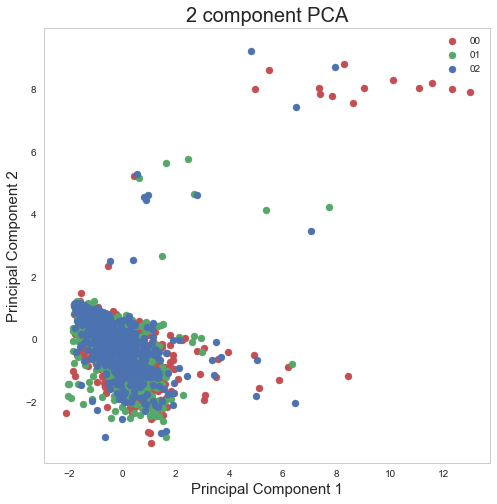

In [407]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
          '18', '19', '20', '21', '22', '23', ]
# colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['start_hour'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# 3.

## Correlation between other factors

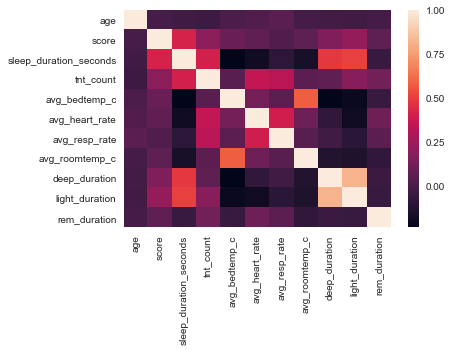

In [330]:
import seaborn as sns
%matplotlib inline

# calculating the correlation matrix on 'new_df' dataframe
corr = new_df.corr()

# plotting the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

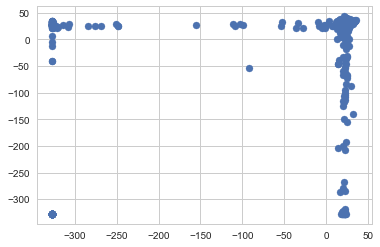

In [335]:
plt.scatter(new_df.avg_roomtemp_c, new_df.avg_bedtemp_c)
plt.show()

In [478]:
# Pairwise Adjacency Matrix

df_merge = df11.merge(df11, on='start_hour')
results = pd.crosstab(df_merge.user_id_x, df_merge.user_id_y)
np.fill_diagonal(results.values, 0)
# results

In [471]:
avnew_df.loc[avnew_df['userId'] == 'b11a260435dd4e399b51b62bd5163371','partner']

796    69a57cee61a84f03bc0420c3702a36f3
855    69a57cee61a84f03bc0420c3702a36f3
907    69a57cee61a84f03bc0420c3702a36f3
913    69a57cee61a84f03bc0420c3702a36f3
914    69a57cee61a84f03bc0420c3702a36f3
Name: partner, dtype: object

In [484]:
mdf = avnew_df.loc[avnew_df['gender'] == 'male']
# mdf.head()

In [485]:
fdf = avnew_df.loc[avnew_df['gender'] == 'female']
# fdf.head()

In [506]:
avnew_df.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,start_hour,start_month,end_hour,end_month
437,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 19:38:00,57.0,2018-06-22 14:08:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,45.924441,10.055331,22.814579,1260.0,5160.0,6960.0,14,06,19,06
450,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 22:41:00,24.0,2018-06-22 20:54:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,48.522727,10.000000,20.578651,300.0,2580.0,1020.0,20,06,22,06
500,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-24 12:31:00,86.0,2018-06-24 00:17:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,60.464121,10.274538,22.225674,600.0,16860.0,10620.0,00,06,12,06
509,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-23 11:04:00,94.0,2018-06-23 01:26:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,68.570583,10.206400,21.605350,2280.0,17220.0,11700.0,01,06,11,06
749,female,1974-03-25 22:42:05,"22.95135616829808,114.054411433392701",b5f5323d9a85420a97a6f40e048855d2,7f3638cc7bd0431dbbc0cfa6a5084892,44,2018-06-24 09:59:00,65.0,2018-06-24 00:53:00,7f3638cc7bd0431dbbc0cfa6a5084892,...,61.170181,10.368031,22.162702,2820.0,10620.0,5220.0,00,06,09,06


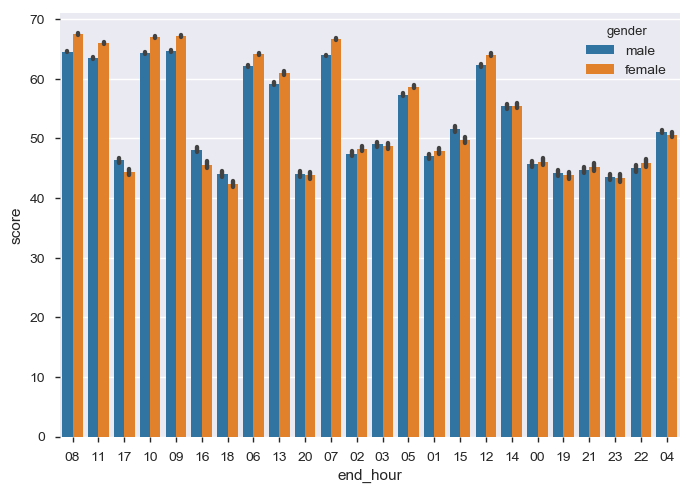

In [508]:
sns.barplot(x="end_hour", y="score", hue="gender", data=new_df)

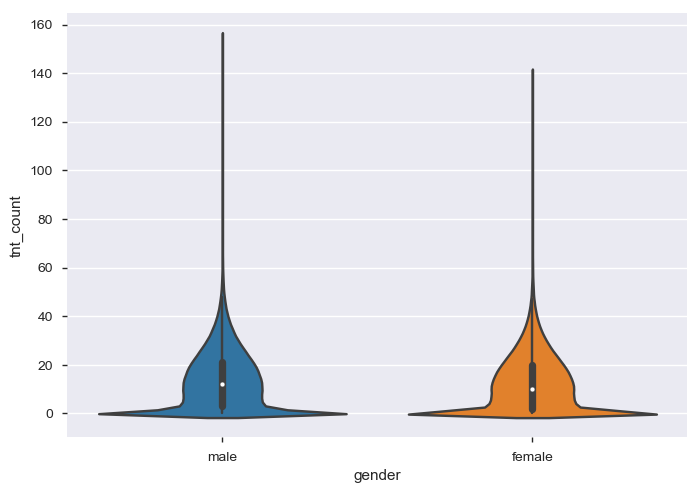

In [535]:
sns.violinplot(x="gender", y="tnt_count", data=new_df, split = True)

Text(0.5,1,'Number of users waking up in each Hour of the Day')

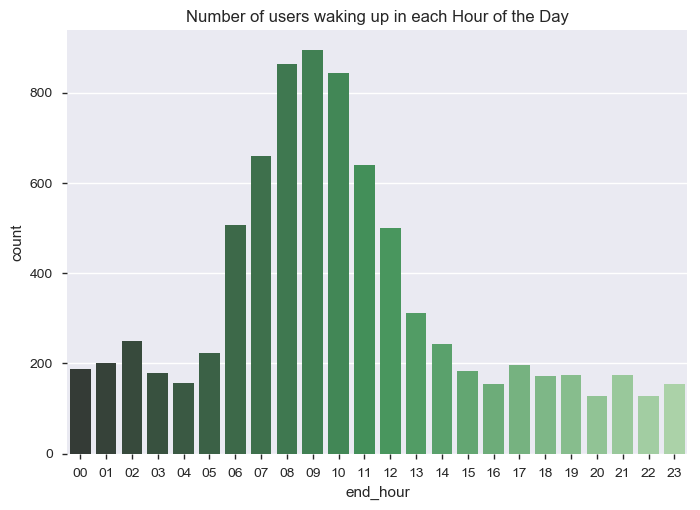

In [511]:
sns.countplot(x="end_hour", data=avnew_df, palette="Greens_d").set_title('Number of users waking up in each Hour of the Day')

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


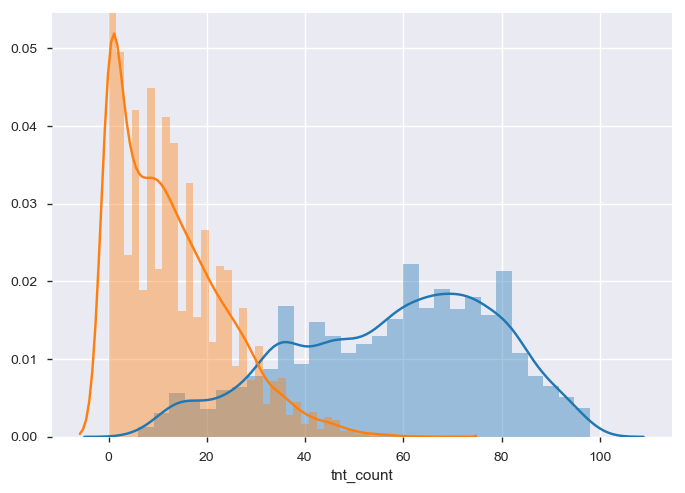

In [513]:
sns.distplot(avnew_df['score'])
sns.distplot(avnew_df['tnt_count'])

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


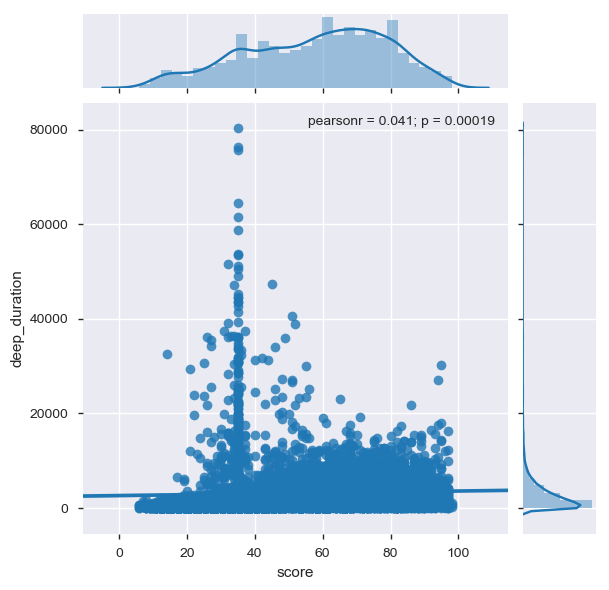

In [524]:
sns.jointplot("score", "deep_duration", data=avnew_df, kind='reg')

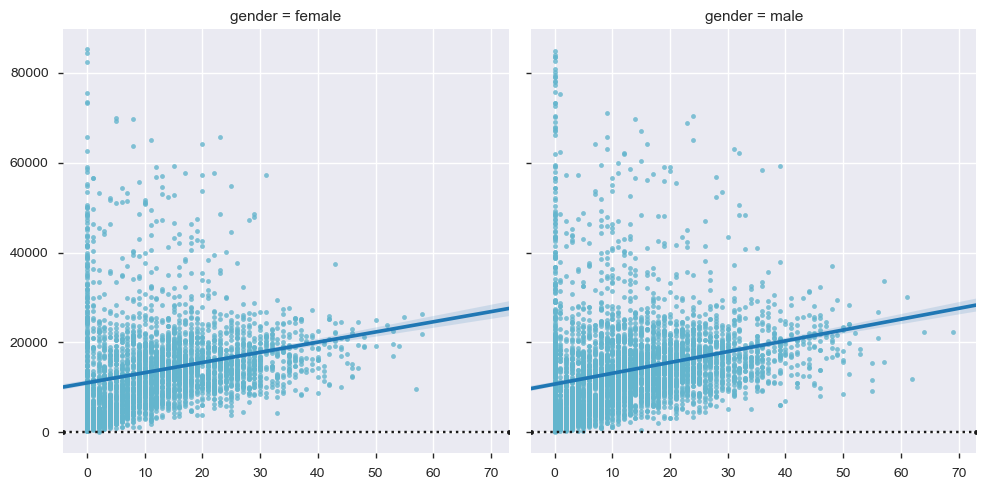

In [533]:
g = sns.lmplot('tnt_count', 'light_duration', col='gender', data=avnew_df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

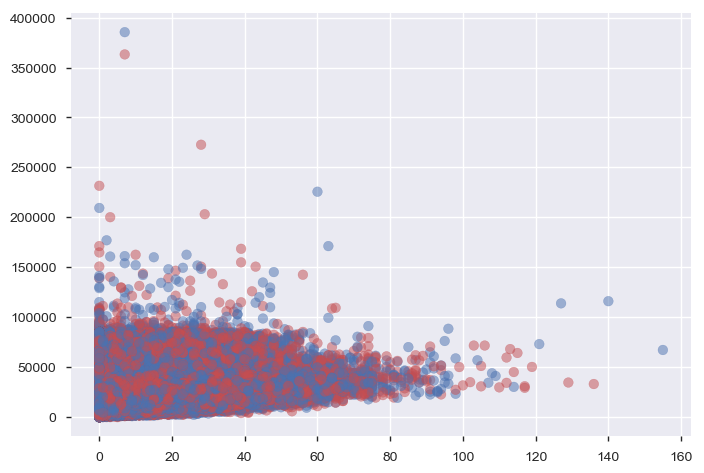

In [540]:
# plt.plot(avnew_df['tnt_count'], avnew_df['sleep_duration_seconds'])
plt.scatter(new_df['tnt_count'], new_df['sleep_duration_seconds'], c=['r','b'], alpha=0.5)
plt.show()

# User Partner Correlation

In [756]:
# subdf = avnew_df.loc[avnew_df['end_hour'] == '09']
# subdf.head()
#  and (new_df['end_hour'] == '09') and (new_df['end_hour'] == '10')
# subsetting male users into new dataframe
subdf = avnew_df.loc[avnew_df['gender'] == 'male']
subdf.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,start_hour,start_month,end_hour,end_month
796,male,1995-07-19 20:00:00,"40.5712266639252874,-111.928902547910738",69a57cee61a84f03bc0420c3702a36f3,b11a260435dd4e399b51b62bd5163371,23,2018-06-26 11:30:00,69.0,2018-06-26 01:08:00,b11a260435dd4e399b51b62bd5163371,...,55.058276,11.423917,20.009350,600.0,19620.0,3000.0,01,06,11,06
855,male,1995-07-19 20:00:00,"40.5712266639252874,-111.928902547910738",69a57cee61a84f03bc0420c3702a36f3,b11a260435dd4e399b51b62bd5163371,23,2018-06-27 11:12:00,52.0,2018-06-27 01:19:00,b11a260435dd4e399b51b62bd5163371,...,52.956960,10.856448,20.714352,2700.0,12660.0,8280.0,01,06,11,06
907,male,1995-07-19 20:00:00,"40.5712266639252874,-111.928902547910738",69a57cee61a84f03bc0420c3702a36f3,b11a260435dd4e399b51b62bd5163371,23,2018-06-24 13:23:00,69.0,2018-06-24 03:12:00,b11a260435dd4e399b51b62bd5163371,...,62.704913,10.751227,19.963479,2820.0,16260.0,6540.0,03,06,13,06
913,male,1995-07-19 20:00:00,"40.5712266639252874,-111.928902547910738",69a57cee61a84f03bc0420c3702a36f3,b11a260435dd4e399b51b62bd5163371,23,2018-06-23 13:08:00,78.0,2018-06-23 01:00:00,b11a260435dd4e399b51b62bd5163371,...,54.098296,10.885383,20.567208,4020.0,14160.0,8880.0,01,06,13,06
914,male,1995-07-19 20:00:00,"40.5712266639252874,-111.928902547910738",69a57cee61a84f03bc0420c3702a36f3,b11a260435dd4e399b51b62bd5163371,23,2018-06-25 11:18:00,67.0,2018-06-25 01:19:00,b11a260435dd4e399b51b62bd5163371,...,65.545406,11.300385,20.226232,900.0,21240.0,3840.0,01,06,11,06


In [757]:
len(subdf)

4729

In [758]:
subdf = subdf.dropna(subset=['sleep_duration_seconds'])

In [759]:
len(subdf)

4729

In [760]:
# df11_new = df11.groupby(['userId'], sort=False).mean()['sleep_duration_seconds']
# df11_new.head()

# Grouping by and finding mean sleep duration
subdf_new = subdf.groupby(['userId'], sort=False).mean()['sleep_duration_seconds']
subdf_new.head()

userId
b11a260435dd4e399b51b62bd5163371    18996.0
155fec4afba3489f910875a01664e8e4     6600.0
95d749650f2243a680ae54870ffe8250    42780.0
bba0eeeb598a46adb897240dd64e6c06    22170.0
43c7150ea87d4199acdcd70ea701ede6     4010.0
Name: sleep_duration_seconds, dtype: float64

In [761]:
# userdata = df11_new.to_frame().reset_index()
# userdata.head()

# Converting to dataframe
userdata = subdf_new.to_frame().reset_index()
userdata.head()

,userId,sleep_duration_seconds
0,b11a260435dd4e399b51b62bd5163371,18996.0
1,155fec4afba3489f910875a01664e8e4,6600.0
2,95d749650f2243a680ae54870ffe8250,42780.0
3,bba0eeeb598a46adb897240dd64e6c06,22170.0
4,43c7150ea87d4199acdcd70ea701ede6,4010.0


In [762]:
len(subdf_new)

1492

In [763]:
# subpdf_new = subdf.groupby(['partner'], sort=False).mean()['sleep_duration_seconds']
# subpdf_new.head()

# Grouping by partners and finding mean sleep duration
subpdf_new = subdf.groupby(['partner'], sort=False).mean()['sleep_duration_seconds']
subpdf_new.head()

partner
69a57cee61a84f03bc0420c3702a36f3    18996.0
a634ff9e19fb43ceab0193484ddbc6b3     6600.0
065c30d3affc4b32b1264788b12cfddd    42780.0
397c7eee39654ec3b3858c4bb3f16599    22170.0
b26d83e8c4d64c34b58461b049aa76c7     4010.0
Name: sleep_duration_seconds, dtype: float64

In [774]:
# partnerdata = pdf11_new.to_frame().reset_index()
# partnerdata.head()
# .reset_index()
# Converting to dataframe
partnerdata = subpdf_new.to_frame()
partnerdata.head()

,sleep_duration_seconds
partner,
69a57cee61a84f03bc0420c3702a36f3,18996.0
a634ff9e19fb43ceab0193484ddbc6b3,6600.0
065c30d3affc4b32b1264788b12cfddd,42780.0
397c7eee39654ec3b3858c4bb3f16599,22170.0
b26d83e8c4d64c34b58461b049aa76c7,4010.0


In [768]:
partnerdata = partnerdata.reset_index()

In [602]:
# df11.loc[df11['userId'] == '01215a75b9fa4884a8afc8646cbb194a','partner']

# subdf.loc[subdf['userId'] == '75eba68431094c55ae1fba56f8f5b861','partner']

In [603]:
# partnerdata.loc[partnerdata['partner'] == '59b39fcbc510488daa57db06d1c6fc9d','sleep_duration_seconds']

In [769]:
# Concatenating User and Partner dataframes

updf = pd.concat([userdata,partnerdata], axis=1)
updf.head()

,userId,sleep_duration_seconds,partner,sleep_duration_seconds
0,b11a260435dd4e399b51b62bd5163371,18996.0,69a57cee61a84f03bc0420c3702a36f3,18996.0
1,155fec4afba3489f910875a01664e8e4,6600.0,a634ff9e19fb43ceab0193484ddbc6b3,6600.0
2,95d749650f2243a680ae54870ffe8250,42780.0,065c30d3affc4b32b1264788b12cfddd,42780.0
3,bba0eeeb598a46adb897240dd64e6c06,22170.0,397c7eee39654ec3b3858c4bb3f16599,22170.0
4,43c7150ea87d4199acdcd70ea701ede6,4010.0,b26d83e8c4d64c34b58461b049aa76c7,4010.0


In [770]:
pasudf = avnew_df.loc[avnew_df['userId'].isin(updf['partner'])]
pasudf = pasudf.reset_index(drop=True)
pasudf.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,start_hour,start_month,end_hour,end_month
0,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 19:38:00,57.0,2018-06-22 14:08:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,45.924441,10.055331,22.814579,1260.0,5160.0,6960.0,14,06,19,06
1,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-22 22:41:00,24.0,2018-06-22 20:54:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,48.522727,10.000000,20.578651,300.0,2580.0,1020.0,20,06,22,06
2,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-24 12:31:00,86.0,2018-06-24 00:17:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,60.464121,10.274538,22.225674,600.0,16860.0,10620.0,00,06,12,06
3,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29,2018-06-23 11:04:00,94.0,2018-06-23 01:26:00,7f4bc30054ec4cc58b0311dfc8ff01ab,...,68.570583,10.206400,21.605350,2280.0,17220.0,11700.0,01,06,11,06
4,female,1974-03-25 22:42:05,"22.95135616829808,114.054411433392701",b5f5323d9a85420a97a6f40e048855d2,7f3638cc7bd0431dbbc0cfa6a5084892,44,2018-06-24 09:59:00,65.0,2018-06-24 00:53:00,7f3638cc7bd0431dbbc0cfa6a5084892,...,61.170181,10.368031,22.162702,2820.0,10620.0,5220.0,00,06,09,06


In [771]:
pasudf['userId'].nunique()

1396

In [772]:
# pasudf_new = pasudf.groupby(['userId'], sort=False).mean()['sleep_duration_seconds']
# pasudf_new.head()

# Grouping by users and finding mean sleep duration for 'partners as users'
pasudf_new = pasudf.groupby(['userId'], sort=False).mean()['sleep_duration_seconds']
pasudf_new.head()

userId
7f4bc30054ec4cc58b0311dfc8ff01ab    11565.0
7f3638cc7bd0431dbbc0cfa6a5084892    13650.0
0feb433dab934151a9126c95c8824e93    12840.0
46725fbcddc74ebdb9da5cfe82202a75    11790.0
14f622f943b5469eb77e7c38dc72c740    68250.0
Name: sleep_duration_seconds, dtype: float64

In [773]:
# Converting to dataframe
# .reset_index()

pdata = pasudf_new.to_frame()
# pdata = pd.DataFrame(index=partnerdata.index)

# pdata.set_index(partnerdata['partner'], inplace=True)
pdata.head()

,sleep_duration_seconds
userId,
7f4bc30054ec4cc58b0311dfc8ff01ab,11565.0
7f3638cc7bd0431dbbc0cfa6a5084892,13650.0
0feb433dab934151a9126c95c8824e93,12840.0
46725fbcddc74ebdb9da5cfe82202a75,11790.0
14f622f943b5469eb77e7c38dc72c740,68250.0


In [775]:
pdata = pdata.reindex(partnerdata.index)
pdata.head()

,sleep_duration_seconds
partner,
69a57cee61a84f03bc0420c3702a36f3,17664.0
a634ff9e19fb43ceab0193484ddbc6b3,12660.0
065c30d3affc4b32b1264788b12cfddd,NaN
397c7eee39654ec3b3858c4bb3f16599,12540.0
b26d83e8c4d64c34b58461b049aa76c7,8064.0


In [776]:
pdata = pdata.reset_index()
pdata.head()

,partner,sleep_duration_seconds
0,69a57cee61a84f03bc0420c3702a36f3,17664.0
1,a634ff9e19fb43ceab0193484ddbc6b3,12660.0
2,065c30d3affc4b32b1264788b12cfddd,NaN
3,397c7eee39654ec3b3858c4bb3f16599,12540.0
4,b26d83e8c4d64c34b58461b049aa76c7,8064.0


In [777]:
pdata.columns = ['userId', 'sleep_duration_seconds']

In [778]:
s1 = pd.merge(userdata, pdata, how='inner', on=['userId'])
s1.head()

,userId,sleep_duration_seconds_x,sleep_duration_seconds_y
0,bba0eeeb598a46adb897240dd64e6c06,22170.0,22170.0
1,36a433258e8941bebac78be43cfc6b68,18060.0,18060.0
2,b043ac7ac34c46bbbf28e9195ac6b3d9,30320.0,30320.0
3,8d3378c747bc456b9a8e2fedc054d92a,12180.0,12180.0
4,34ab5aa9aaf146f88a8b7e6238b2c50d,31170.0,31170.0


In [779]:
len(s1)

438

In [780]:
finaludf = userdata.loc[~userdata['userId'].isin(s1['userId'])]
len(finaludf)

1054

In [781]:
finalpdf = pdata.loc[~pdata['userId'].isin(s1['userId'])]
len(finalpdf)

1054

## Final user & partner DF

In [782]:
finaludf = finaludf.reset_index(drop=True)
finaludf.head()

,userId,sleep_duration_seconds
0,b11a260435dd4e399b51b62bd5163371,18996.0
1,155fec4afba3489f910875a01664e8e4,6600.0
2,95d749650f2243a680ae54870ffe8250,42780.0
3,43c7150ea87d4199acdcd70ea701ede6,4010.0
4,587941e3583d4f2393e4fb275e63b60b,16140.0


In [783]:
finalpdf = finalpdf.reset_index(drop=True)
finalpdf.head()

,userId,sleep_duration_seconds
0,69a57cee61a84f03bc0420c3702a36f3,17664.0
1,a634ff9e19fb43ceab0193484ddbc6b3,12660.0
2,065c30d3affc4b32b1264788b12cfddd,NaN
3,b26d83e8c4d64c34b58461b049aa76c7,8064.0
4,74cbc60042854dfb9b1c08cc5e17e449,29580.0


In [784]:
# combined user and partner dataframes

cdf = pd.concat([finaludf,finalpdf], axis=1)
cdf.columns = ['User', 'User Sleep Duration', 'Partner', 'Partner Sleep Duration']
cdf.head()

,User,User Sleep Duration,Partner,Partner Sleep Duration
0,b11a260435dd4e399b51b62bd5163371,18996.0,69a57cee61a84f03bc0420c3702a36f3,17664.0
1,155fec4afba3489f910875a01664e8e4,6600.0,a634ff9e19fb43ceab0193484ddbc6b3,12660.0
2,95d749650f2243a680ae54870ffe8250,42780.0,065c30d3affc4b32b1264788b12cfddd,NaN
3,43c7150ea87d4199acdcd70ea701ede6,4010.0,b26d83e8c4d64c34b58461b049aa76c7,8064.0
4,587941e3583d4f2393e4fb275e63b60b,16140.0,74cbc60042854dfb9b1c08cc5e17e449,29580.0


In [785]:
subdf.loc[subdf['userId'] == 'b11a260435dd4e399b51b62bd5163371','partner']

796    69a57cee61a84f03bc0420c3702a36f3
855    69a57cee61a84f03bc0420c3702a36f3
907    69a57cee61a84f03bc0420c3702a36f3
913    69a57cee61a84f03bc0420c3702a36f3
914    69a57cee61a84f03bc0420c3702a36f3
Name: partner, dtype: object

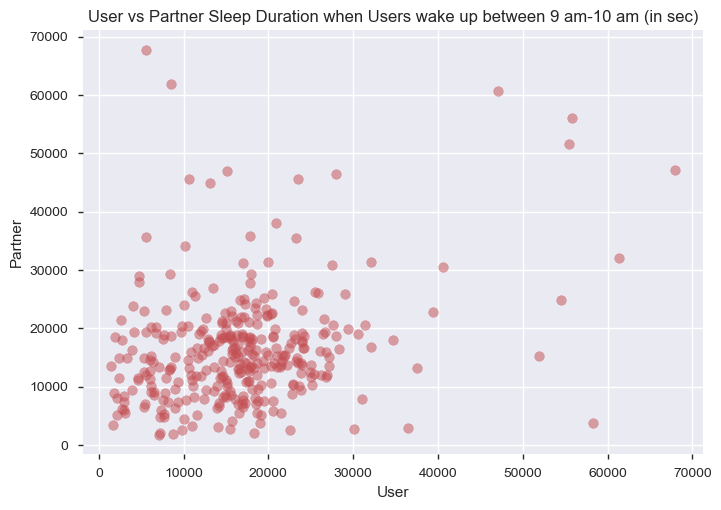

In [754]:
plt.scatter(cdf['User Sleep Duration'], cdf['Partner Sleep Duration'], c=['r'], alpha=0.5)
plt.title('User vs Partner Sleep Duration when Users wake up between 9 am-10 am (in sec)')
plt.xlabel('User')
plt.ylabel('Partner')
plt.show()

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


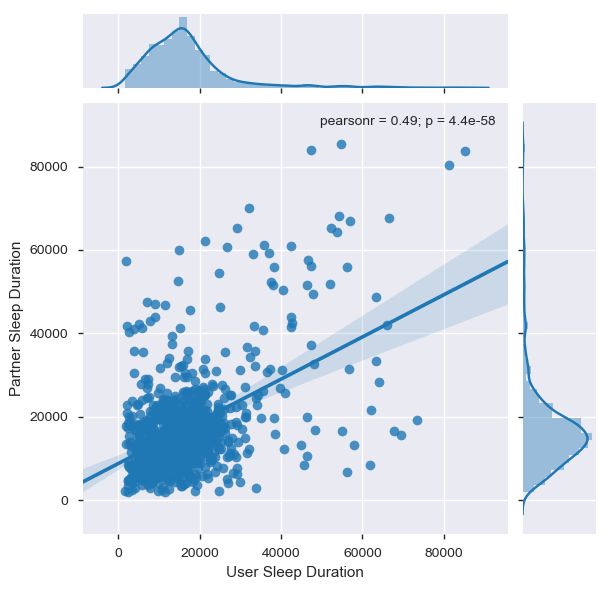

In [791]:
# Seaborn plot showing average sleep durations of Users and Partners 

sns.jointplot("User Sleep Duration", "Partner Sleep Duration", data=cdf, kind='reg')

In [789]:
# plt.scatter(cdf['User Sleep Duration'], cdf['Partner Sleep Duration'], c=['g'], alpha=0.5)
# plt.title('User vs Partner Sleep Duration (in sec)')
# plt.xlabel('Male User')
# plt.ylabel('Female Partner')
# plt.show()

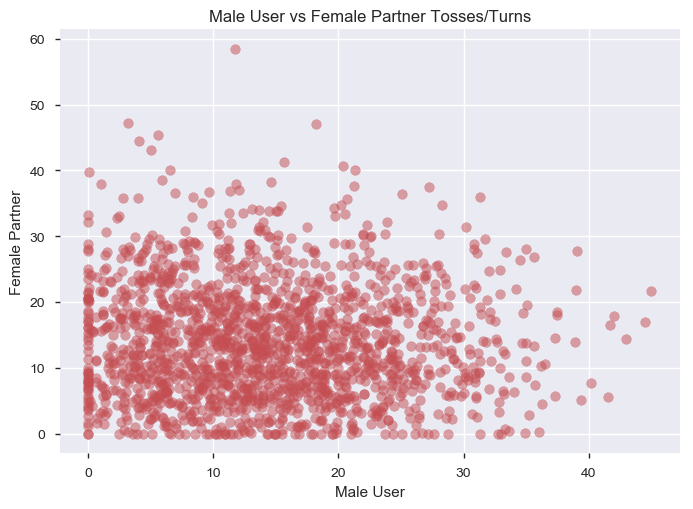

In [622]:
plt.scatter(cdf['User Tosses/Turns (Avg)'], cdf['Partner Tosses/Turns(Avg)'], c=['r'], alpha=0.5)
plt.title('Male User vs Female Partner Tosses/Turns')
plt.xlabel('Male User')
plt.ylabel('Female Partner')
plt.show()

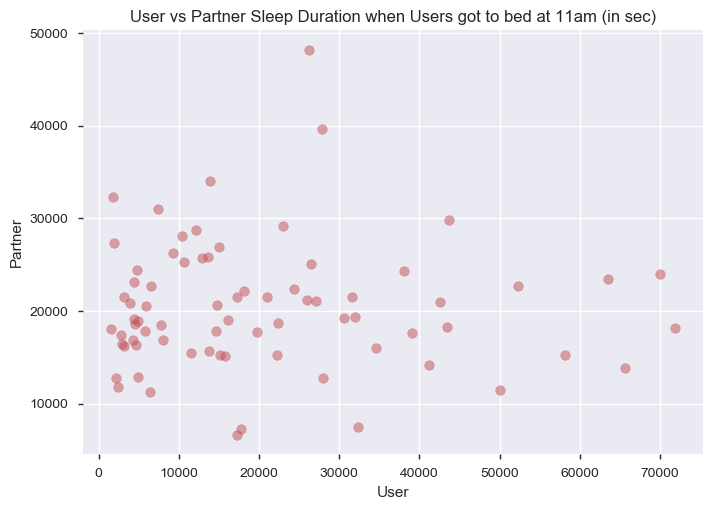

In [584]:
plt.scatter(cdf['User Sleep Duration'], cdf['Partner Sleep Duration'], c=['r'], alpha=0.5)
plt.title('User vs Partner Sleep Duration when Users got to bed at 11am (in sec)')
plt.xlabel('User')
plt.ylabel('Partner')
plt.show()

In [ ]:
pasudf = new_df.loc[new_df['userId'].isin(updf['partner'])]
pasudf.head()